In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import input_data

In [35]:
mnist = input_data.read_data_sets('data/',one_hot=True)
testimg    = mnist.test.images[:10]
testlabel  = mnist.test.labels[:10]

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [5]:
# 定义输入
n_hidden_1 = 256  # 第一层的神经元
n_hidden_2 = 128  # 第二层的神经元
n_input = 784     #  输入的神经元的像素点
n_classes = 10    # 10分类 10个神经元

# 参数初始化
x = tf.placeholder(tf.float32,[None,n_input])  # 样本的个数是不确定的
y = tf.placeholder(tf.float32,[None,n_classes])

# NETWORK PARAMETER
stddev = 0.1
weights = {
    # 对w1 w2 进行高斯初始化
    'w1':tf.Variable(tf.random_normal([n_input,n_hidden_1],stddev=stddev)),
    'w2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2],stddev=stddev)),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes],stddev=stddev))
}
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}
print('NETWORK PARAMETER')

NETWORK PARAMETER


In [6]:
# 将模型前向传播
def multilayer_perceptron(_X,_weights,_biases):
    layer1 = tf.nn.sigmoid(tf.add(tf.matmul(_X,_weights['w1']),_biases['b1']))
    layer2 = tf.nn.sigmoid(tf.add(tf.matmul(layer1,_weights['w2']),_biases['b2']))
    return (tf.matmul(layer2,_weights['out']) + _biases['out'])

In [11]:
# prediction
pred = multilayer_perceptron(x,weights,biases)
# loss and  optimizer
# 使用交叉熵函数求损失值
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred,labels=y)) 
# 使用梯度下降进行求解最优化
optm = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

# 看模型的精度值 准确率   比较预测值的索引和真实值的索引
corr = tf.equal(tf.argmax(pred,1),tf.argmax(y,1)) # 每一行的最大的索引看是否相同
accr = tf.reduce_mean(tf.cast(corr,dtype=tf.float32)) # 转化类型

#进行初始化
init = tf.global_variables_initializer()
print('FUNCTION READY')
# save
save_step = 1  # 选择隔几个epoch进行保存
saver = tf.train.Saver(max_to_keep=3)   # 最多保存3个
print('GRAPH READY')

FUNCTION READY
GRAPH READY


In [47]:
do_train = 3 
training_epochs = 100
batch_size = 100
display_step = 4
with tf.Session() as sess:
    sess.run(init)
    path1 = './log'
    writer = tf.summary.FileWriter(path1,sess.graph) 
    # optimize
    if do_train==1:
        for epoch in range(training_epochs):
            avg_cost = 0
            # 所有的batch
            total_batch = int(mnist.train.num_examples/batch_size)
            for i in range(total_batch):
                # batch的X和Y
                batch_xs,batch_ys = mnist.train.next_batch(batch_size)
                feeds = {x:batch_xs,y:batch_ys}
                sess.run(optm,feed_dict=feeds)
                avg_cost +=sess.run(cost,feed_dict=feeds)
            avg_cost = avg_cost/total_batch  # 求出每个batch的损失值
            # display
            if (epoch+1)% display_step==0:
                print('Epoch:%03d/%03d cost:%.9f'%(epoch,training_epochs,avg_cost))
                feeds_train = feeds = {x:batch_xs,y:batch_ys}
                train_acc = sess.run(accr,feed_dict=feeds_train)
                print('train_acc: %.3f'%(train_acc))
                feed_test = {x:mnist.test.images,y:mnist.test.labels}
                test_acc = sess.run(accr,feed_dict=feed_test)
                print('test_acc:%.3f'
                     %(test_acc))
            if epoch%save_step ==0:
                saver.save(sess,'./save/nn_mnist_basic.ckpt-'+str(epoch))
        print('OPTIMIZATION FINISHED')
    if do_train==0:
        epoch = training_epochs-1
        saver.restore(sess,'./save/nn_mnist_basic.ckpt-'+str(epoch))
        test_acc = sess.run(accr,feed_dict={X:testimg,y:testlabel})
        print('test accuracy:%.3f'%(test_acc))
       
    if do_train==3:
        epoch = training_epochs-1
        saver.restore(sess,'./save/nn_mnist_basic.ckpt-'+str(epoch))
        
        test_acc = sess.run(pred,feed_dict={x:testimg})
        print(sess.run(tf.argmax(testlabel,1)))
        print(sess.run(tf.argmax(test_acc,1)))
        print(testlabel)
        print((test_acc))
       
print('DONE')
            

INFO:tensorflow:Restoring parameters from ./save/nn_mnist_basic.ckpt-99
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 6 9]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[-1.5673461  -1.7840015  -1.2985053  -1.1588182   0.7166771  -0.19592369
  -2.518224    4.3596478  -0.9037143   1.9465756 ]
 [ 1.1870462  -1.1134104   2.8671212   1.4973713  -2.9957607   1.1319065
   1.9165404  -3.7543192   0.9303621  -3.7963548 ]
 [-3.894053    3.7890098   0.2606628   0.02815515 -1.2230754  -0.06636691
  -0.6789942   0.28941512  0.05811366 -0.69216156]
 [ 4.867693   -5.2033453   0.6643786  -0.2252096  -2.0083907   1.7887008
   1.2365569  -1.2033055  -0.28263542 -1.8353386 ]
 [-1.4820986  -3.4936752   0.26537097 -2.5343246   3.04

How does the training data look like?
0th Training Data Label is 7


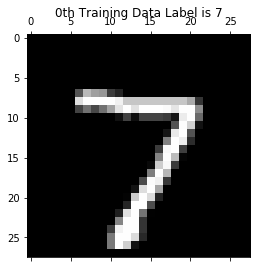

1th Training Data Label is 2


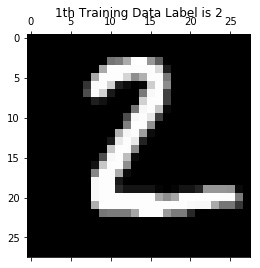

2th Training Data Label is 1


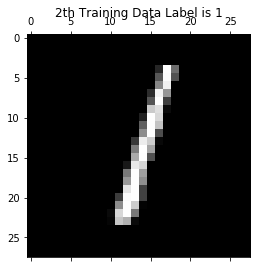

3th Training Data Label is 0


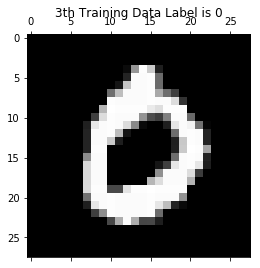

4th Training Data Label is 4


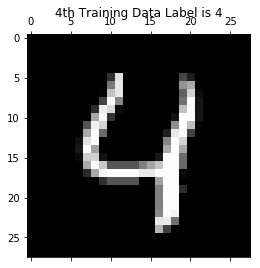

5th Training Data Label is 1


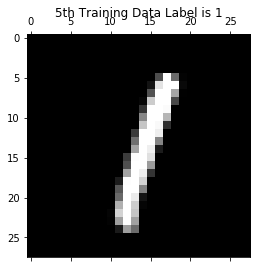

6th Training Data Label is 4


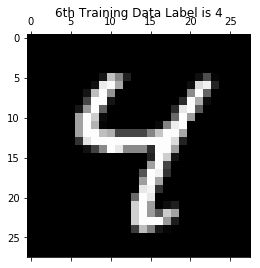

7th Training Data Label is 9


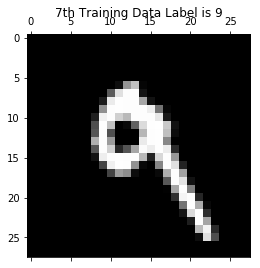

8th Training Data Label is 5


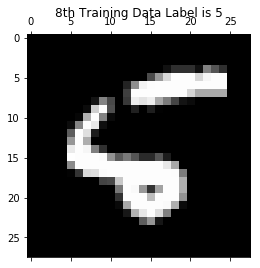

9th Training Data Label is 9


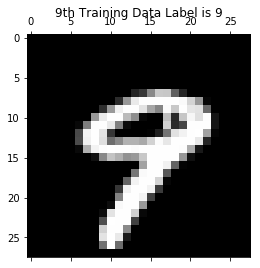

In [43]:
print ("How does the training data look like?")
# nsample = 10
# randidx = np.random.randint(testimg.shape[0], size=nsample)

for i in range(testimg.shape[0]):
    curr_img   = np.reshape(testimg[i, :], (28, 28)) # 28 by 28 matrix 
    curr_label = np.argmax(testlabel[i, :] ) # Label
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.title("" + str(i) + "th Training Data " 
              + "Label is " + str(curr_label))
    print ("" + str(i) + "th Training Data " 
           + "Label is " + str(curr_label))
    plt.show()

In [53]:
for i in range(4): 
    d = i * 2 
    print(d)

0
2
4
6


In [59]:
def Fun1():
    x=5
    def fun3():
                                   #强制声明不是局部变量
        x *=x
        return x
    return fun3()